# This note book for inferential statistics course taught in Udacity

In [112]:
import pandas as pd
import numpy as np
from IPython.display import Image
from IPython.core.display import HTML 
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(8, 5))
plt.rc("font", size=14)

#### Terms
    Population mean = mu 
    Populatin sd = SD (or sigma)
    Sample mean = x_bar 
    Sample sd (Standard erro) = SE

#### Central limit theorem
    mean of distribution of samples mean = Population mean 
    SE = SD  /sqrt(n) , where n = number of samples




#### Normal Distribution
	95% of sample means fall within 2 * SE  (exact 1.96) distance of population mean.
	1.96 are CRITICAL values of Z for 95% confidence.
	
	98% of sample means fall within 2.33 * SE   distance of population mean.
	2.33 are CRITICAL values of Z for 98% confidence.

	99% of sample means fall within 2.576 * SE   distance of population mean.
	2.576 are CRITICAL values of Z for 99% confidence.


#### Confidence Interval:
	98 % confidence interval for population mean : (x_bar - Z(=2.33) * SE,    x_bar + Z(2.33) *SE)
	95 % confidence interval for populatin mean  : (x_bar - Z(=1.96) * SE,    x_bar + Z(1.96) *SE)

	Margin of Error : Z *SE 

######################################################################################################################
# z test
If population mean and sd are known we can uswe z test
#### Probality of getting sample mean (x_bar) from popultion mean (mu):
    first calculate SE = SD/sqrt(n)

    z score = (x_bar - mu)/ SE 
    Then use z- score table : 
        for P(Z < score)  take direct number 
        for P(Z> score) take 1- number

Other examples here:  https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/sas/sas4-onesamplettest/sas4-onesamplettest5.html

#### Levels of likelihood
 	If probability of getting sample mean (by chance)  less than ( alpha levels :: 5% or 0.05, 1% or 0.001, .01% or 0.0001),
    which is usually considered unlikely.
 	To get z-critical value for alpha level (get the z-value  for area 1-alpha level)

## One tailed  test
To get z-critical value at 0.05 confidence \
look at the z-table for 1-0.05 = 0.95 \
which gives 1.65
<img src="critical.png">


In above example for z = 1.82 , from z table: 
<img src = "https://s3.amazonaws.com/udacity-hosted-downloads/ZTable.jpg">

We will get the value 0.9656\
Hence probalility of getting x_bar more than z value is 1-0.9656 = 0.034 \
Therefore x_bar is significant at p < 0.05

#####################################################################################################################
## Two tailed test
<img src = "two_tailed.png">


For two-tailed t test, to get the z-critical value at 0.05 confidence, look at the z table for 0.025\
you will get -1.96, and put +1.96 on the other end

#####################################################################################################################
## Summary critical values 
<img src = "onevstwo.png">

#####################################################################################################################
## Hypothesis testing
Null or H0        : population mean before = population mean after certained condition \
Alternative or H1 : population mean before != or > or < population mean after certained condition \
For Null hypothesis to be true, the sample mean (its z-score) lies outside the critical region (in white space).

#### Note
Hypothesis testing is just seeing if you can reject the null hypothesis or not\
We are not proving any Hypothesis\
Look at this one-tailed examples. We just failed to reject the null hypothesis

<img src = "dog.png">
    

###### When to use one-tailed test: If you know the effect of intervention (either going to increase or decrease )
###### When to use tow-tailed test: If you are not certained about the intervention

#####################################################################################################################
## What does it mean to reject the null?
<img src = "reject.png">


#####################################################################################################################


##### Example:
We failed to reject null because the z-score falls in the white region. \
Or probability of geting by chance (not by intervention) is greater than confidence level.
<img src = "rejectnull.png">

In [113]:
#####################################################################################################################

### Decision erros
<img src = "errors.png">

##### If you reject null based on p < 0.05, Type I error is 5%

#####################################################################################################################
#### Problem 1
<img src = "problem1.png">

In [114]:
# This in one-tailed test 
# Null : music does not imporve memory
# Alternative: music imporves memore
mu = 25
sigma = 6
x_bar = 28
n = 36
SE = sigma / np.sqrt(36)
z = (x_bar - mu)/SE
z_critical = 1.65 # of alpha = 0.05 , look the table for 0.95
if z > z_critical:
    print("Improvement very unlikely (5%) to be by a chance.")
    print("Rejecting Null: Music indeed improves the memory by p < 0.05")
else:
    print("Can not reject Null: Music does not improve the memory")

Improvement very unlikely (5%) to be by a chance.
Rejecting Null: Music indeed improves the memory by p < 0.05


######################################################################################################################
## t test
z test works when you know populatin mu and sigma but most of the time we don't. \
In general we don't have population SD (sigma) information, the we need t-test. \
From t test we can do two kinds of test: 
* How different a sample mean from a population 
* How different two sample means are from each other

######################################################################################################################
##### t distribution
If degree of freedom increases , t distribution tends to population distribution
<img src = "t-distribution.png">

######################################################################################################################
##### t table
Unlike z table, where table values indicate probability and x and y axis give z-score,\
values in t table are critical values and x axis is for confidence interval and y axis is for degree of freedom
<img src = "https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg">

##### Looking at the t table we can say that t-critical value for a one-tailed alpha level of 0.05 is 1.782
##### Let's look at two-tailed t test
<img src = "twotailed_t.png">

##### The answer is looking at 0.025 confidence level at df of 29 is 2.045

In [115]:
# Example 1
# Lets we have a sample data 
sample = [5, 19, 11, 23, 12, 7,3, 21]
# Problem:
   # If the population mean is significantly greter than 10 [one-tailed]
   # If the population mean is  significantly less than 10  [one-tailed]
   # If pupulation mean is significantly different than 10  [two-tailed]
# First calculate mean of the sample
mu0 = 10
x_bar = np.mean(sample)
# degree of freedom
df = len(sample)-1
# sample SD, s value
def s_value(sample):
    x_bar = np.mean(sample)
    df = len(sample)-1
    sum_of_error = 0
    for xi in sample:
        sum_of_error += (xi - x_bar)**2
    s = np.sqrt(sum_of_error/df)
    return s
        
s = s_value(sample)  
SE = s/np.sqrt(len(sample))
t = (x_bar - mu0)/SE


t value is 0.977 \
if we check that  for 7 df , probability lies between 0.15 to 0.20 for one tailed \
For two tailed test, just multiply this interval by two, 0.3 to 0.4 \
Hence for alpha level of 0.05 in either test we can not reject null hypothesis. \
That is population mean is not significantly different than 10

In [116]:
# Example 2:
'''
In california mean reant of a single bed appt is $1830. 
A rental company wants to estimate average rent and 
they selected a random sample of 25 found mean rent $1700 and sample SD of $200.
Test if population mean is significanlty different than $1830
'''
# This is two sample t test
mu0 = 1830
x_bar = 1700
s = 200
n = 25
df = 24
SE = s/np.sqrt(25)
t = (x_bar - mu0)/ SE




t value is -3.25, from t table for 24 df, it lies between (0.001 to 0.0025) \
For two tailed the values is (0.002 to 0.005).
We can get exact p-value from this link : https://www.graphpad.com/quickcalcs/pValue1/ \
Which gives the  value equals  to 0.0034.
So it is significant and we can reject null hypothesis.\
We can conclude that mean rent is sinificantly different than $1830 for 0.005 confidence level (95% confidence interval).


#### Measuring effect size while comparing mean
<img src = "cohen.png">

In [117]:
cohen_d = (x_bar - mu0)/s
cohen_d

-0.65

### Paired samples t-test
#### A. Dependent t-test for samples of  same subject over two conditions
<img src = "dependent.png">

##### Where D is absolute difference

Hypothesis for two conditions A and B are for the population
* H0: mu_A = mu_B
* H1: 
      mu_A > mu_B
      mu_A > mu_B
      mu_A != mu_B

#### B. Independent samples t-test
<img src = "independent.png">

###########################################################################
#### Problem example

You and your friends want to go out to eat, but you don't want to pay a lot.
You decide to either go to Gettysburg
or Wilma. You look online and find the average meal prices at 18
restaurants in Gettysburg and It restaurants in Wilma. \
You can get the data from this link: https://docs.google.com/spreadsheets/d/1bNeiNwHKgTbg-6h_ahFuDUd_TkVWDuIrTvELAvcKzUc/edit#gid=0


In [118]:
# Load the data 
# Average meal price at Gettysburg
Getty = [9, 5, 6, 11, 8, 5, 7, 13, 12, 13, 9, 8, 10, 6, 11, 9, 7, 12]
# Average meal price at Wilma
Wilma = [11, 10, 12, 9, 8, 13, 14, 15, 12, 11, 13, 8, 9, 11]

n_G = len(Getty)
n_W = len(Wilma)
df = n_G + n_W -2
# Calculate mean
G_bar = np.mean(Getty)
W_bar = np.mean(Wilma)

# Calculate sample SD
s_G = s_value(Getty) 
s_W = s_value(Wilma)

# Hypothesis for two tailed t-test
# H0: mu_G = mu_W
# H1: mu_G != mu_W

# calculate standard error
SE = np.sqrt(s_G**2/n_G + s_W**2/n_W )
# calculate t
t = (G_bar - W_bar)/ SE
print(t,df )

-2.5769390582356815 30


Since it is two tailed test, hence t =+/- 2.58 \
Look at the t table for df (n1 + n2 -2) 30 is (0.005 to 0.001) *2 \
You can look at the link: : https://www.graphpad.com/quickcalcs/pValue1/ to get exact p-value.\

**Or you can look at the t-critical value for 0.05/2 (two-tailed) in the table which is 2.042, which is less than 2.58.** \
Hence, it is significant at 0.05 alpha level. \
We reject Null Hypothesis.
##### Conclusion: Average price of meal over two locations is significantly different

In [119]:
# Confidence inter for 95% confidence
# (MD - t *SE, MD + t *SE)

# Calculate mean difference
MD = abs(G_bar - W_bar)
t = 2.58
CI = (MD - t *SE, MD + t *SE)
print(CI)

(-0.002611320288026686, 4.3994367171134225)


In [120]:
# Since MD is 2.12, What proportion of difference is contributed to location?
# Calculate r^2
r_squared = (t**2)/ (t**2 + df)







### Note: R_squared measures the proportion of a differnce in means that can be explained by the independent variable

### Pool Variance and Corrected Standard Errof
##### Standard error we used SE = sqrt(S1^2/n1 + S2^2/n2) assumes that samples have approximately same size. We need to correct it for various sample size
<img src = "pool2.png">

##### Note: If H0 (Null Hypotheis) is not zero, then we have to use full t value, putting mu_x - mu_y

##############################################################
##### In Summary t independent test
<img src = "tsummary.png">

### Problem
If have two samples X (n = 18, mean = 3.8) and Y (n= 25, mean = 2.1) with pool variance is 0.13. Test if mean population of X is greater than Y. 

In [121]:
# Solution 
# It is one-tailed t test
# H0: mu_x <= mu_y
# H1: mu_x > mu_y
x_bar = 3.8
y_bar = 2.1
n_x = 18
n_y = 25
sp_squared = 0.13
df = n_x + n_y -2
# Standard Error
SE = np.sqrt(sp_squared/n_x + sp_squared/n_y)

# T stat
t = (x_bar - y_bar)/SE
# t is 15.25
# for confidence interval 0.05 and df of 41
t_critical = 1.68
# t is greater than t_critical,
# We reject the Null

######################################################
#### Problem: Two tailed
##### Note : while looking a t-table look for half of condidence level
A_bar = 35.8,
n_A = 207,
SS_A = 481\
B_bar = 31.6,
n_B  = 220,
SS_B = 322

Test if population mean of A is different than B at 0.01 level of confidence

In [122]:
# Solution
# This is two-tailed test
# Hypotheis:
#    H0: mu_A - mu_B = 0
#    H1: mu_A - mu_B != 0


A_bar = 35.8
n_A = 207
SS_A = 481

B_bar = 31.6
n_B = 220
SS_B = 322
# Calculate pooled variance
df_A = n_A -1
df_B = n_B -1
df = n_A + n_B -2
SP_squared = (SS_A + SS_B)/ (df_A + df_B)
# Standard error
SE = np.sqrt(SP_squared/n_A + SP_squared/n_B)

# find t_critical for 0.01/2 (two-tailed) level of confidence in t-table at df = 425
# t_critical <= +/- 2.62

# calculate t value
t = (A_bar - B_bar)/SE
# t = 31.55
# Since t > t_critical, null hypothesis is rejected

######################################################################
######################################################################
# ANOVA 
**Comparing means of more than two Samples**\
Basic: How can we compare three or more samples? \
***Find the average squared deviation of each sample mean from the total mean (GRAND MEAN). The Grand Mean is mean of all values. If samples have same number of obsevations, then the Grand Mean is equal to mean of sample means.*** \
ANOVA accounts for between-group and within group variablity.\
<img src = "anova.png">




################################################################
##### ANOVA Hypothesis
H0: Population mean of all group is same \
H1: At least one pair of samples is singificantly different\

If within group variablity increases, it favors H0 and between group variablity favors H1


***ANOVA depends upon F statistics or F-ratio.\
F = Between Group Variablity / Within Group Variablity\
Large F score favors Alternative Hypothesis***
<img src = "anova2.png">

## One-Way ANOVA

If you are testing hypotheses that require the comparison of three or more samples, then you need to use the analysis of variance (ANOVA) statistic.  You can not simply use multiple t-tests because that will increase the Type I error to the point where your statistical analysis will become invalid. A One-Way ANOVA is used if your experimental design has only one independent variable (with three or more levels or groups). If you have two independent variables you are forced to use a Two-Way ANOVA.
<img src = "fratio.png">

Where:\
N = The total number of observations

n or (n_k) = The number of observations within a group

K = The number of groups.\
In above formula we assume that n is same for all group, otherwise it should in inside the summation.\
F-distribution is positively skewed distribution peaked at 1.

If the null hypothesis is true, then on average the F-ratio for ANOVA is expected to have a value near 1.00. Because the between-group variability and within-group variability should be roughly equal

In [123]:
# Example consider following data a sample with three groups
# It is shoe price for three different brands.
group1 = [15,12,14,11]
group2 = [39, 45, 48, 60]
group3 = [65, 45, 32, 38]
# calculate mean and grand mean
x1_bar = np.mean(group1)
x2_bar = np.mean(group2)
x3_bar = np.mean(group3)
xg_bar = np.mean([group1, group2, group3])

In [124]:
print(xg_bar, x1_bar, x2_bar, x3_bar)

35.333333333333336 13.0 48.0 45.0


In [125]:
# Now calculate sum of squares between the group
def ss_between(list_of_groups):
    ss_bet = 0
    merged_list = [value for item in list_of_groups for value in item]
    xg_bar = np.mean(merged_list)
    for group in list_of_groups:
        x_bar = np.mean(group)
        ss_bet += len(group) * (x_bar - xg_bar)**2
    return ss_bet
        
        

In [126]:
# apply the function to calculate the sum of squares between the groups
ss_bet = ss_between([group1, group2, group3])
ss_bet

3010.666666666667

In [127]:
# Now calculate sum of squares within the group
def ss_within(list_of_groups):
    ss_wthn = 0
    for group in list_of_groups:
        x_bar = np.mean(group)
        for x in group:
            ss_wthn += (x - x_bar)**2
    return ss_wthn
        
        

In [128]:
# apply the function to calculate the sum of squares within the groups
ss_wthn = ss_within([group1, group2, group3])
ss_wthn

862.0

In [129]:
# Calculate the degree of freedom
def df(list_of_groups):
    # df_between = k -1, whre k is number of groups
    # df_within = N - k
    k = len(list_of_groups)
    N = 0
    for group in list_of_groups:
        N += len(group)
    df_between = k-1
    df_within = N-k
    return(df_between, df_within)
        

In [130]:
# Calculate the degree of freedom
df_between, df_within = df([group1, group2, group3])
print(f'df_between: {df_between} and  df_within: {df_within}')

df_between: 2 and  df_within: 9


In [131]:
# Calculate F-ratio
F = (ss_bet/df_between) / (ss_wthn/df_within)
F

15.716937354988401

Now look at the F table to find critical value for alpha level 0.05 

for degree of freedom 2  and 9 (df1= df_between, df2 = df_within)


<img src = "ftable.png">

**It is 4.26**

***Hence F_value (15.72) is greater than F_critial (4.26) at 0.05 confidence level, we reject the null and conclude that at least one group has significantly different prices.***


####################################################
## Multiple Comparision test
ANOVA F-test tells us wheter there is significant different between mean of multiple grouops or not

It actually doest not tell us which two pairs are significantly different.
To find the pairwise difference we can to multiple comparision test. (Like we did in cohen's d test to determine size effect in t-test)

The first one I am using here is **Tukey's Honestly Significant Difference (HSD).**

<img src = "tukey.png">


The studentized range statistic (q)* table is given below:

<img src= "qtable.png">

For sample size k = 3 and df_within = 9 is : **3.95.**

In [132]:
# Calculate Tukey's HSD
q = 3.95
ms_within = ss_wthn/df_within
n = 3 # Number of groups
Tukey_HSD = q * np.sqrt(ms_within/n)
Tukey_HSD

22.318697526048854

The Tykey's HSD value 22.32 means, if the absolute mean difference between any two groups is greater then 22.32 then they are significantly different.

In [133]:
# lets check this
print(f'mean diffecence between group1 and group2: {abs(x1_bar - x2_bar)}')
print(f'mean diffecence between group1 and group3: {abs(x1_bar - x3_bar)}')
print(f'mean diffecence between group2 and group3: {abs(x2_bar - x3_bar)}')

mean diffecence between group1 and group2: 35.0
mean diffecence between group1 and group3: 32.0
mean diffecence between group2 and group3: 3.0


***We can conclude that at alpha level 0.05 mean difference between group1 and group2,   and mean difference between group1 and group2 are significantly different.***

Next one I am going to discuss is **Cohen's d** for Multiple Comparison.

d = (X1_bar - X2_bar) / MS_within

In [134]:
# Calculate d
MS_within = ss_wthn/df_within
d12 = (x1_bar - x2_bar)/ MS_within
d13 = (x1_bar - x3_bar)/ MS_within
d23 = (x2_bar - x3_bar)/ MS_within
print(d12, d13, d23)

-0.36542923433874713 -0.3341067285382831 0.031322505800464036


Another Method to calculate the size effect is eta-squared (n^2)\
which proportion of total variation that is due to between group differences.

n^2 = SS_between / (SS_between + SS_within)

In [135]:
# Calculate n^2
n_squared = ss_bet / (ss_bet + ss_wthn)
print(n_squared)
# 0.78
# Which explains that 78% of difference is due to the differences between brand price, other 28% is unexplained
# Anything bigger than 14% is considered big.

0.7774143570321914


##### Example ANOVA with different sample/grup size
We have following data

<img src = "cancer.png">

In [136]:
# Lets solve the problem
placebo = [1.5, 1.3, 1.8, 1.6, 1.3]
drug1 = [1.6, 1.7, 1.9, 1.2]
drug2 = [2.0, 1.4, 1.5, 1.5, 1.8, 1.7, 1.4]
drug3 = [2.9, 3.1, 2.8, 2.7]
# Calculate mean
xp_bar = np.mean(placebo)
x1_bar = np.mean(drug1)
x2_bar = np.mean(drug2)
x3_bar = np.mean(drug3)
print(xp_bar, x1_bar, x2_bar, x3_bar)

1.4999999999999998 1.5999999999999999 1.6142857142857143 2.875


In [137]:
# calculate grand mean
total = [placebo , drug1,drug2, drug3]
merged_list = [value for item in total for value in item]
xg_bar = np.mean(merged_list)

print(xg_bar)

1.8350000000000002


In [138]:
## Calculate sum of squares between and within
ss_b = ss_between(total)
ss_w = ss_within(total)
print(ss_b, ss_w)

5.449428571428573 0.8360714285714286


In [139]:
## get degree of freedom
# Calculate the degree of freedom
df_b, df_w = df(total)
print(f'df_between: {df_b} and  df_within: {df_w}')

df_between: 3 and  df_within: 16


In [140]:
# Calculate mean sum of squares
ms_b = ss_b/df_b
ms_w = ss_w/df_w
print(ms_b, ms_w)

1.816476190476191 0.052254464285714286


In [141]:
# Calculate F ratio
F = ms_b/ms_w
F

34.7621244482415

In [142]:
# What proportion of the difference between tumor reduction is due to the type of drug?
# Calculate n^2
n_squared = ss_b / (ss_b + ss_w)
n_squared

0.8669841017307408

#### Wrap up
<img src = "assume.png">

######################################################################################################
######################################################################################################
######################################################################################################
# Chapter 2 : Correlation
We can simply inspect the correlation between two variables (independent and dependent ) using Scatterplot.

In statistics, we can quantify the relationship between two variable by calculating **Correlation coefficeint (r).**


<img src = "correlation.png">

To determine if a correlation coefficient is statistically significant, you can calculate the corresponding t-score and p-value.

The formula to calculate the t-score of a correlation coefficient (r) is:

t = r * √n-2 / √1-r2

The p-value is then calculated as the corresponding two-sided p-value for the t-distribution with n-2 degrees of freedom.

In [143]:
# Example 
x = [3, 4, 4, 5, 7, 8, 10, 12, 13, 15]
y = [2, 4, 4, 5, 4, 7, 8, 19, 14, 10]

#### Formula for r
<img src = "pearson.png">


In [144]:
# Solution
# Define a function to calculate covariance between two groups
def Cov_xy(group1, group2):
    cov = 0
    x1_bar = np.mean(group1)
    x2_bar = np.mean(group2)
    for i in range(len(group1)):
        cov += (group1[i] - x1_bar) * (group2[i] - x2_bar)
    return cov/(len(group1)-1)

# Define a function to calculate standared deviation
def sigma(group):
    ss = 0
    x_bar = np.mean(group)
    for item in group:
        ss += (item -  x_bar)**2
    s = np.sqrt(ss/(len(group)-1))
    return s

In [145]:
# calculate r
r = Cov_xy(x,y) / (sigma(x) *sigma(y))
print(r)

0.807617703074863


In [146]:
# calculate t
# t = r * √n-2 / √1-r2
t = r * np.sqrt(len(x)-2) / np.sqrt(1- r**2)
t

3.8736018351473174

In [147]:
# find t_critical for 0.05/2 (two-tailed) level of confidence in t-table at n = 8 (10-2)
t_critical = 2.306
# Since t > t_critical,  we reject null, that means there is sinificance correlation between two groups

In [148]:
# Using python package directly
# This example is copied from source:
# https://www.statology.org/correlation-test-in-python/
from scipy.stats.stats import pearsonr

#calculation correlation coefficient and p-value between x and y
pearsonr(x, y)


<ipython-input-148-6e9ab49a8256>:4: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


(0.8076177030748631, 0.004717255828132089)

Here’s how to interpret the output:

Pearson correlation coefficient (r): 0.8076

Two-tailed p-value: 0.0047

Since the correlation coefficient is close to 1, this tells us that there is a strong positive association between the two variables.

And since the corresponding p-value is less than .05, we conclude that there is a statistically significant association between the two variables.

#### Spearman’s Rank Correlation Coefficient
If your data is not linearly distributed, you should use Spearman’s Rank Correlation Coefficient instead of the Pearson Correlation Coefficient. The Spearman’s Rank Correlation Coefficient is designed for distributions that are monotonic.

<img src = "spearman.png">


For example of python to calculate Spearman’s Rank Correlation Coefficient, please visit this site:

<https://towardsdatascience.com/statistics-in-python-understanding-variance-covariance-and-correlation-4729b528db01>

######################################################################################################
######################################################################################################
######################################################################################################
# Chapter 3 : Regression

<img src = "regression.png">

The line of best fit helps us:

1. Describe the data 
2. Make prediction

In [149]:
# Using statsmodels to do regression analysis
import statsmodels.api as sm
from statsmodels.formula.api import ols
data = pd.DataFrame({"x":x, "y":y})
model = ols("y ~ x", data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     15.00
Date:                Mon, 18 Jul 2022   Prob (F-statistic):            0.00472
Time:                        08:52:33   Log-Likelihood:                -25.084
No. Observations:                  10   AIC:                             54.17
Df Residuals:                       8   BIC:                             54.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5208      2.368     -0.220      0.8

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


eval_env: 1


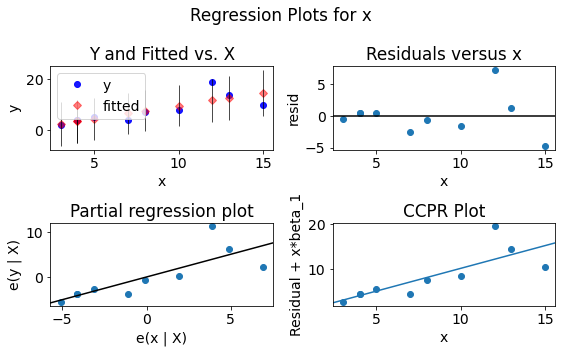

In [150]:
fig = sm.graphics.plot_regress_exog(model, "x")
fig.tight_layout(pad=1.0)

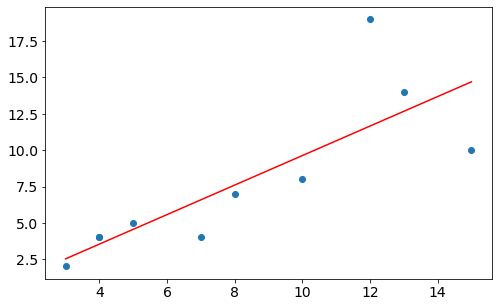

In [151]:
# Visualizing the regression line
plt.scatter(x, y)
x =  np.array(x)
plt.plot(x, -0.5208 + (1.0149* x), 'r')
plt.show()

##############################################################################################
##############################################################################################
##############################################################################################
## Chi-square test
What we have done so far (z-test, t-test, ANOVA (F-test), corrlation, regression) are pametric test that use numerical data which requires mean and standard deviation. 

However, some data does not have parametric information.\
Examples includes the ***Categorical data:*** \
preference of beach or mountain\
Eye color (e.g. “blue”, “green”, “brown”)\
Gender (e.g. “male”, “female”)\
Marital status (e.g. “married”, “single”, “divorced”)

There are two types of categorical variable, nominal and ordinal.\
A nominal variable has no intrinsic ordering to its categories. For example, gender is a categorical variable having two categories (male and female) with no intrinsic ordering to the categories.\
An ordinal variable has a clear ordering. For example, temperature as a variable with three orderly categories (low, medium and high). 

We use frequancy or proportion to describe these data. Hypothesis testing used for such kind of data are called ***non parametric test.***

In statistics, there are two different types of Chi-Square tests:

1. **The Chi-Square Goodness of Fit Test** – Used to determine whether or not a categorical variable follows a hypothesized distribution. 

    Example: A shop owner wants to know if an equal number of people come into a shop each day of the week, so he counts the number of people who come in each day during a random week.
    
    A die is suspected of being biased. To test this, you will roll the die 24 times and record the outcome of each roll.
    

2. **The Chi-Square Test of Independence** – Used to determine whether or not there is a significant association between two categorical variables.

    Example: Researchers want to know if gender is associated with political party preference in a certain town so they survey 500 voters and record their gender and political party preference.
    
    

    
    
<img src = "chi.png">

The link to chi-square table is : https://people.richland.edu/james/lecture/m170/tbl-chi.html

Or you can use Graphpad: https://www.graphpad.com/quickcalcs/pValue1/

In [152]:
## Example of Chi-Square Goodness of Fit Test

# For total population of 15000 people attemped to climb Mt. A, 33% of success rate is observed. A mountaineer compay, X,  found that
# it observed 41 people climed Mt. A out of 100 attempts.

# Hypothesis:
# H0: success rate is 33%

# Expected frequency: successful= 33, unsuccessful= 67
# Observed frequency: successful= 41, unsuccessful = 59

# Now calculate chi-sqaure
f_o = [41, 59]
f_e = [33,67]
def chi_square(f_o, f_e):
    chi = 0
    for i in range(len(f_o)):
        chi += (f_o[i] - f_e[i]) **2 / f_e[i]
    return chi

chi_square(f_o, f_e)
# chi_square = 2.89, and df = 1 (if we know successful, can calculate unsuccessful)
# using the link: https://www.graphpad.com/quickcalcs/pValue1/
# or table: https://people.richland.edu/james/lecture/m170/tbl-chi.html
# We get two-tailed p_value = 0.0891 
# Which is not significant for 0.05 alpha level.




2.8946178199909545

## Example of Chi-Square Test of Independence
<img src = "chi2.png">

Here are two variables, 1.Survival rate, 2.Types of accomodation\
H0: Types of accomodation and survival rate are independent

In [153]:
# Solution
f_o = pd.DataFrame({"cabin": [299, 280], "steerage": [186, 526]})
total_total = f_o.sum().sum()
col_total = list(f_o.sum())
row_total = list(f_o.sum(axis = 1))

# Calculate expect3e in wame order (column total * rowtotal / total total)

f_e = [i*j/total_total for i in col_total for j in row_total]
f_e

[217.51742835011618, 361.4825716498838, 267.4825716498838, 444.5174283501162]

In [154]:
f_o = list(pd.melt(f_o)["value"])
f_o

[299, 280, 186, 526]

In [155]:
# calculate chi_square
chi_square(f_o,f_e)

88.6487963871521

In [156]:
df = 1
# Critical value of chi-square at df 1 and p = 0.05 is (from table)
chi_critical = 3.841

# Since chi_square is greater than chi_critical we reject null
# We conclude that survival rate is dependent to accomodations